In [44]:
### Problem 3 

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['figure.dpi'] = 80
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 300}
plt.rc('font', **font)
sns.set()


######## PROJECTION FUNCTIONS ##########

## Random Projections ##
def random_matrix(d, k):
    '''
    d = original dimension
    k = projected dimension
    '''
    return 1./np.sqrt(k)*np.random.normal(0, 1, (d, k))

def random_proj(X, k):
    _, d= X.shape
    return X.dot(random_matrix(d, k))

## PCA and projections ##
def my_pca(X, k):
    '''
    compute PCA components
    X = data matrix (each row as a sample)
    k = #principal components
    '''
    n, d = X.shape
    assert(d>=k)
    _, _, Vh = np.linalg.svd(X)    
    V = Vh.T
    return V[:, :k]

def pca_proj(X, k):
    '''
    compute projection of matrix X
    along its first k principal components
    '''
    P = my_pca(X, k)
    # P = P.dot(P.T)
    return X.dot(P)


######### LINEAR MODEL FITTING ############

def rand_proj_accuracy_split(X, y, k):
    '''
    Fitting a k dimensional feature set obtained
    from random projection of X, versus y
    for binary classification for y in {-1, 1}
    '''
    
    # test train split
    _, d = X.shape
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    # random projection
    J = np.random.normal(0., 1., (d, k))
    rand_proj_X = X_train.dot(J)
    
    # fit a linear model
    line = sklearn.linear_model.LinearRegression(fit_intercept=False)
    line.fit(rand_proj_X, y_train)
    
    # predict y
    y_pred=line.predict(X_test.dot(J))
    
    # return the test error
    return 1-np.mean(np.sign(y_pred)!= y_test)

def pca_proj_accuracy(X, y, k):
    '''
    Fitting a k dimensional feature set obtained
    from PCA projection of X, versus y
    for binary classification for y in {-1, 1}
    '''

    # test-train split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    # pca projection
    P = my_pca(X_train, k)
    P = P.dot(P.T)
    pca_proj_X = X_train.dot(P)
                
    # fit a linear model
    line = sklearn.linear_model.LinearRegression(fit_intercept=False)
    line.fit(pca_proj_X, y_train)
    
     # predict y
    y_pred=line.predict(X_test.dot(P))
    

    # return the test error
    return 1-np.mean(np.sign(y_pred)!= y_test)


In [48]:
######## LOADING THE DATASETS #########

# to load the data:
data1 = np.load('data1.npz')
X1 = data['X']
y1 = data['y']
n1, d1 = X1.shape

data1 = np.load('data2.npz')
X2 = data['X']
y2 = data['y']
n2, d2 = X2.shape

data3 = np.load('data3.npz')
X3 = data['X']
y3 = data['y']
n3, d3 = X3.shape

n_trials = 10  # to average for accuracies over random projections

######### YOUR CODE GOES HERE ##########

# Using PCA and Random Projection for:
# Visualizing the datasets
## Part h
plt.figure()
plt.scatter(random_proj(X1, 2)[:, 0], random_proj(X1, 2)[:, 1], label='Random projects')
plt.scatter(pca_proj(X1, 2)[:, 0], pca_proj(X1, 2)[:, 1], label='PCA')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.tick_params(labelsize=18)
plt.legend(fontsize=20)
plt.show()

plt.figure()
plt.scatter(random_proj(X2, 2)[:, 0], random_proj(X2, 2)[:, 1], label='Random projects')
plt.scatter(pca_proj(X2, 2)[:, 0], pca_proj(X2, 2)[:, 1], label='PCA')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.tick_params(labelsize=18)
plt.legend(fontsize=20)
plt.show()

plt.figure()
plt.scatter(random_proj(X3, 2)[:, 0], random_proj(X3, 2)[:, 1], label='Random projects')
plt.scatter(pca_proj(X3, 2)[:, 0], pca_proj(X3, 2)[:, 1], label='PCA')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.tick_params(labelsize=18)
plt.legend(fontsize=20)
plt.show()

# Computing the accuracies over different datasets.
## Part i
# dataset 1
pcaAcc1 = np.zeros(d1)
randAcc1 = np.zeros(d1)
for i in range(d1):
    pcaAcc1[i] = pca_proj_accuracy(X1, y1, i+1) 
    randAcc1[i] = rand_proj_accuracy_split(X1, y1, i+1)
plt.figure()
plt.plot(np.arange(1,d1+1), randAcc1, label='Random projects')
plt.plot(np.arange(1,d1+1), pcaAcc1, label='PCA')
plt.xlabel('k', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.tick_params(labelsize=18)
plt.legend(fontsize=20)
plt.show()

# dataset 2
pcaAcc2 = np.zeros(d2)
randAcc2 = np.zeros(d2)
for i in range(d2):
    pcaAcc2[i] = pca_proj_accuracy(X2, y2, i+1) 
    randAcc2[i] = rand_proj_accuracy_split(X2, y2, i+1)
plt.figure()
plt.plot(np.arange(1,d1+1), randAcc1, label='Random projects')
plt.plot(np.arange(1,d1+1), pcaAcc1, label='PCA')
plt.xlabel('k', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.tick_params(labelsize=18)
plt.legend(fontsize=20)
plt.show()

# dataset 3
pcaAcc3 = np.zeros(d3)
randAcc3 = np.zeros(d3)
for i in range(d3):
    pcaAcc1[i] = pca_proj_accuracy(X3, y3, i+1) 
    randAcc1[i] = rand_proj_accuracy_split(X3, y3, i+1)
plt.figure()
plt.plot(np.arange(1,d3+1), randAcc1, label='Random projects')
plt.plot(np.arange(1,d3+1), pcaAcc1, label='PCA')
plt.xlabel('k', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.tick_params(labelsize=18)
plt.legend(fontsize=20)
plt.show()

# And computing the SVD of the feature matrix
## Part j
sing1 = np.linalg.svd(X1, compute_uv=False)
sing2 = np.linalg.svd(X2, compute_uv=False)
sing3 = np.linalg.svd(X3, compute_uv=False)
plt.figure()
plt.plot(np.arange(1,len(sing1)+1), sing1, label='Dataset 1')
plt.plot(np.arange(1,len(sing2)+1), sing2, label='Dataset 2')
plt.plot(np.arange(1,len(sing3)+1), sing3, label='Dataset 3')
plt.xlabel('Singular values', fontsize=20)
plt.tick_params(labelsize=18)
plt.legend(fontsize=20)
plt.show()

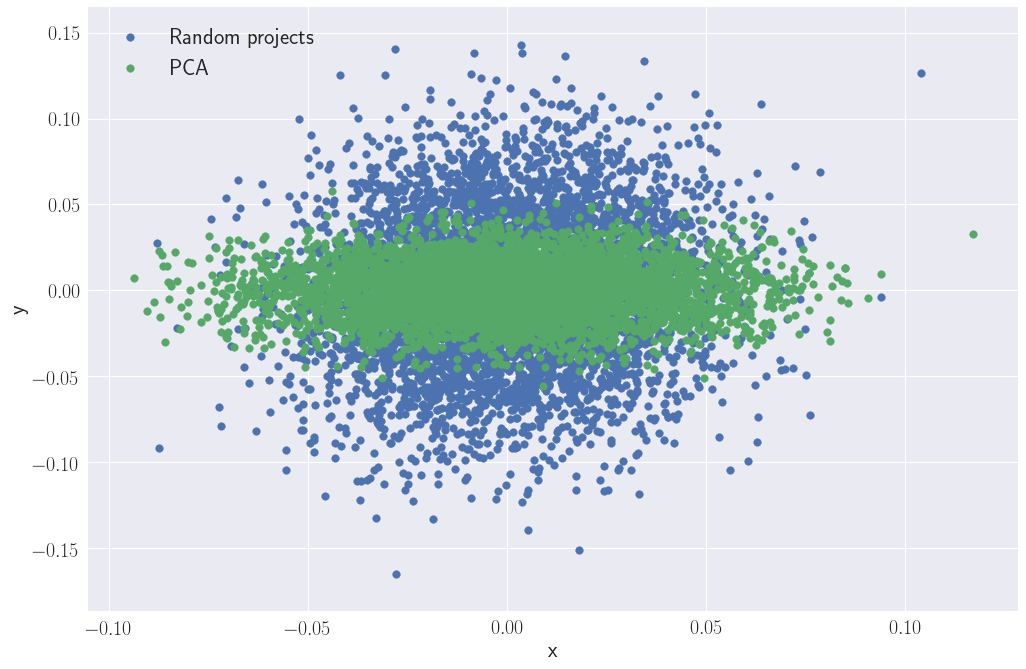

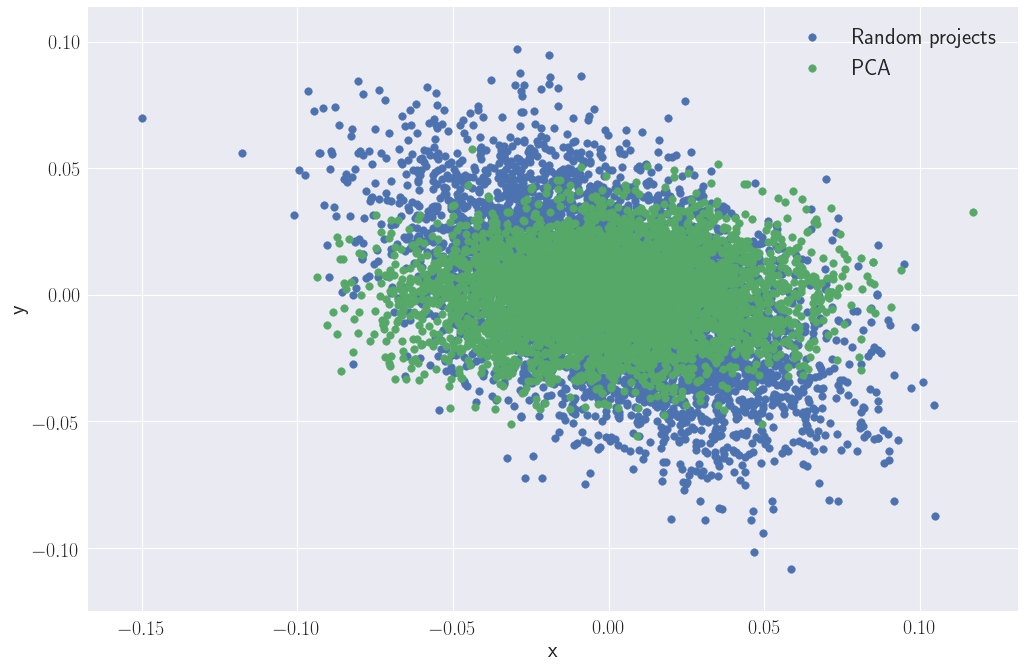

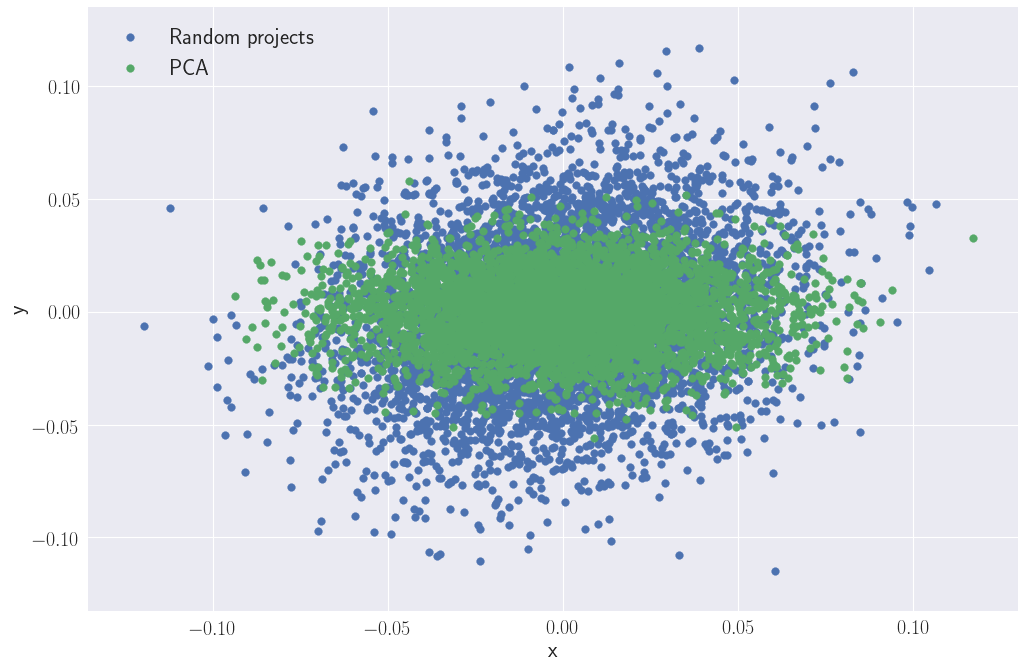

In [54]:
## Part h
plt.figure()
plt.scatter(random_proj(X1, 2)[:, 0], random_proj(X1, 2)[:, 1], label='Random projects')
plt.scatter(pca_proj(X1, 2)[:, 0], pca_proj(X1, 2)[:, 1], label='PCA')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.tick_params(labelsize=18)
plt.legend(fontsize=20)
plt.show()

plt.figure()
plt.scatter(random_proj(X2, 2)[:, 0], random_proj(X2, 2)[:, 1], label='Random projects')
plt.scatter(pca_proj(X2, 2)[:, 0], pca_proj(X2, 2)[:, 1], label='PCA')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.tick_params(labelsize=18)
plt.legend(fontsize=20)
plt.show()

plt.figure()
plt.scatter(random_proj(X3, 2)[:, 0], random_proj(X3, 2)[:, 1], label='Random projects')
plt.scatter(pca_proj(X3, 2)[:, 0], pca_proj(X3, 2)[:, 1], label='PCA')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.tick_params(labelsize=18)
plt.legend(fontsize=20)
plt.show()

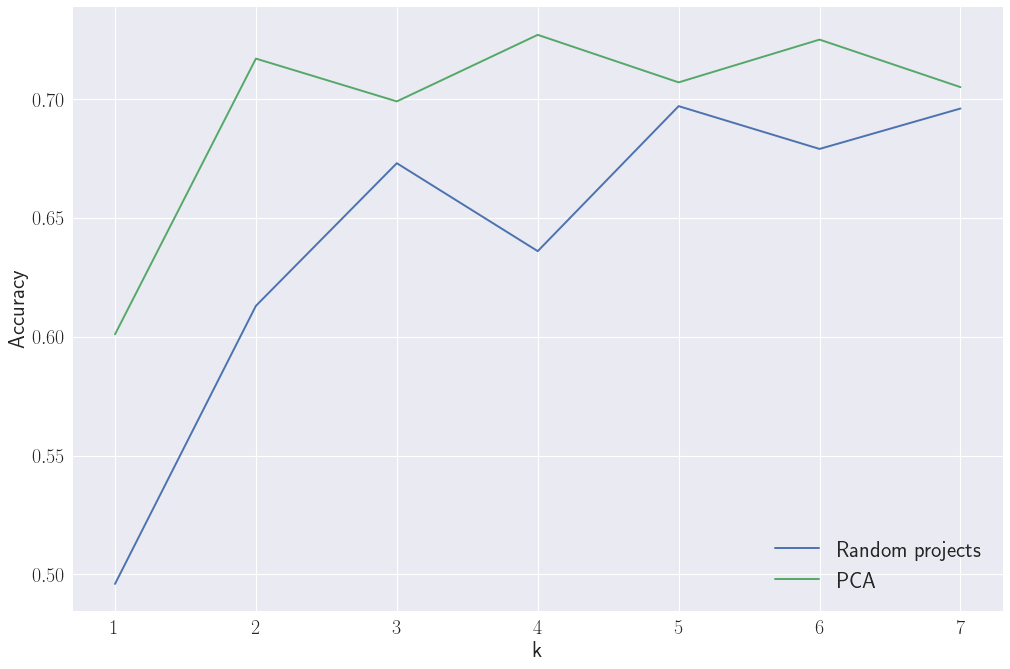

In [89]:
## Part i
# dataset 1
pcaAcc1 = np.zeros(d1)
randAcc1 = np.zeros(d1)
for i in range(d1):
    pcaAcc1[i] = pca_proj_accuracy(X1, y1, i+1) 
    randAcc1[i] = rand_proj_accuracy_split(X1, y1, i+1)
plt.figure()
plt.plot(np.arange(1,d1+1), randAcc1, label='Random projects')
plt.plot(np.arange(1,d1+1), pcaAcc1, label='PCA')
plt.xlabel('k', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.tick_params(labelsize=18)
plt.legend(fontsize=20)
plt.show()

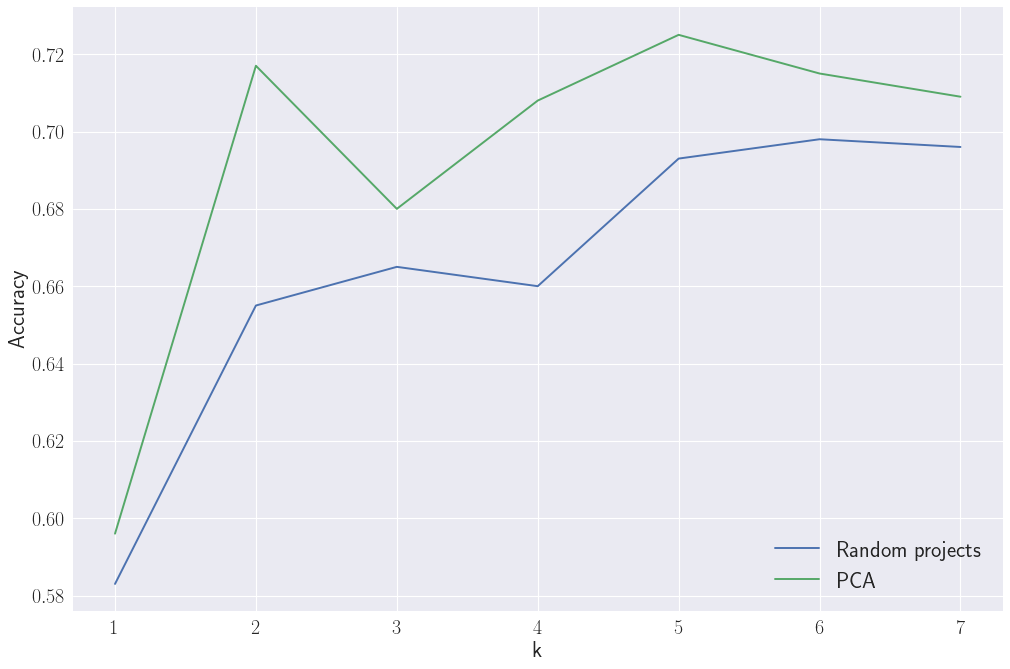

In [92]:
# dataset 2
pcaAcc2 = np.zeros(d2)
randAcc2 = np.zeros(d2)
for i in range(d2):
    pcaAcc2[i] = pca_proj_accuracy(X2, y2, i+1) 
    randAcc2[i] = rand_proj_accuracy_split(X2, y2, i+1)
plt.figure()
plt.plot(np.arange(1,d1+1), randAcc1, label='Random projects')
plt.plot(np.arange(1,d1+1), pcaAcc1, label='PCA')
plt.xlabel('k', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.tick_params(labelsize=18)
plt.legend(fontsize=20)
plt.show()

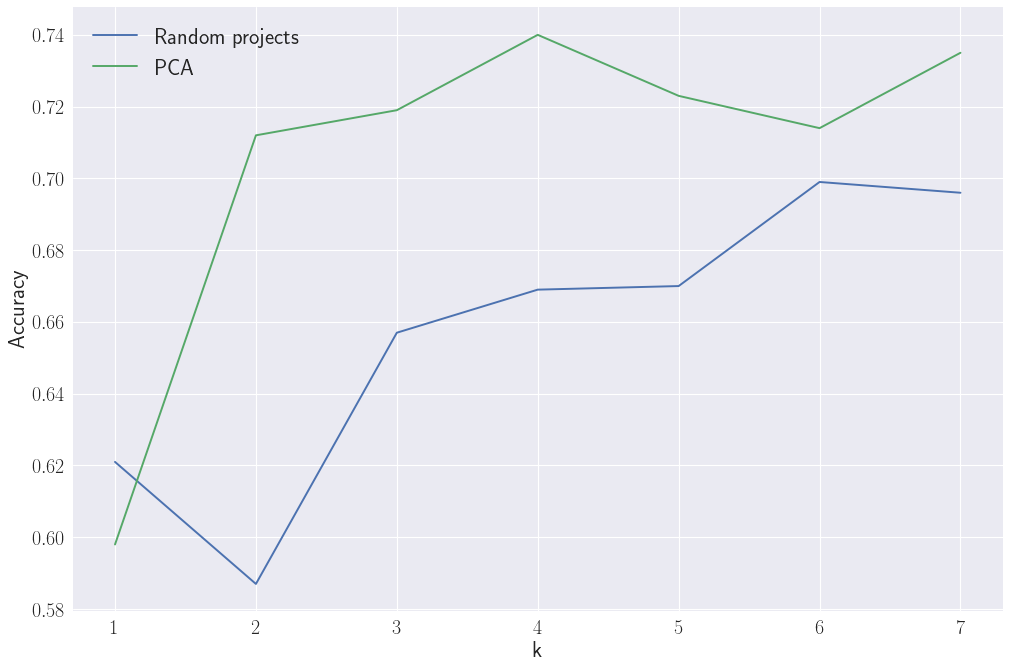

In [93]:
# dataset 3
pcaAcc3 = np.zeros(d3)
randAcc3 = np.zeros(d3)
for i in range(d3):
    pcaAcc1[i] = pca_proj_accuracy(X3, y3, i+1) 
    randAcc1[i] = rand_proj_accuracy_split(X3, y3, i+1)
plt.figure()
plt.plot(np.arange(1,d3+1), randAcc1, label='Random projects')
plt.plot(np.arange(1,d3+1), pcaAcc1, label='PCA')
plt.xlabel('k', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.tick_params(labelsize=18)
plt.legend(fontsize=20)
plt.show()

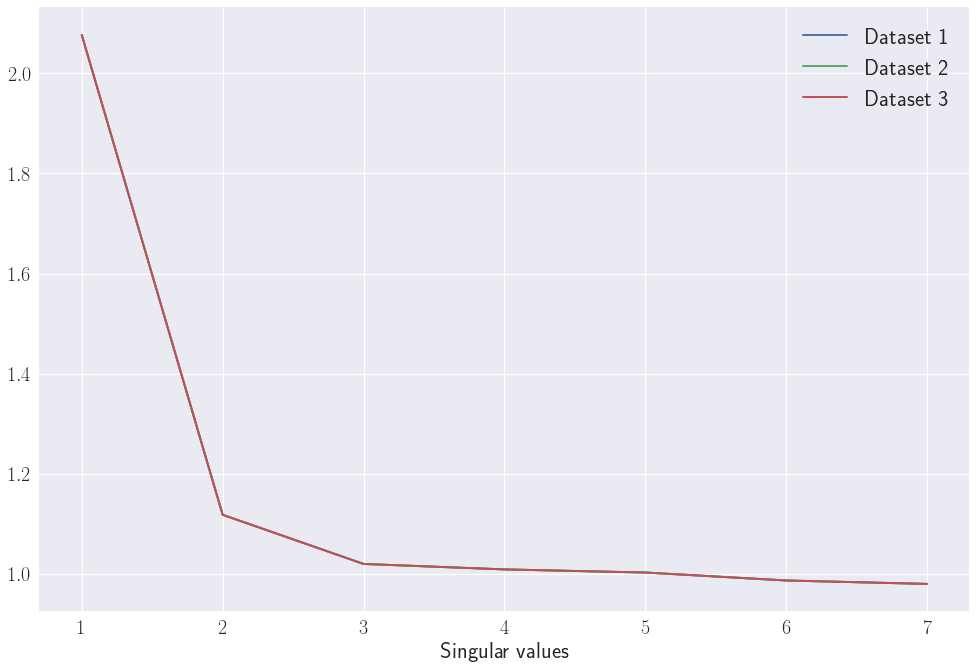

In [96]:
sing1 = np.linalg.svd(X1, compute_uv=False)
sing2 = np.linalg.svd(X2, compute_uv=False)
sing3 = np.linalg.svd(X3, compute_uv=False)
plt.figure()
plt.plot(np.arange(1,len(sing1)+1), sing1, label='Dataset 1')
plt.plot(np.arange(1,len(sing2)+1), sing2, label='Dataset 2')
plt.plot(np.arange(1,len(sing3)+1), sing3, label='Dataset 3')
plt.xlabel('Singular values', fontsize=20)
plt.tick_params(labelsize=18)
plt.legend(fontsize=20)
plt.show()

In [99]:
np.linalg.svd(X1, compute_uv=False)

array([ 2.07683126,  1.11797354,  1.01973294,  1.00880076,  1.00257839,
        0.9866638 ,  0.97979606])